# Projeto de Pesquisa NANOMED - UFRN/EMCM
    
  ## Grupo:
    Profa. Dra. Janine Braz (Coodenadora)
    Prof. Dr. Diego Bonfada (Coordenador Adjunto)
    Prof. Dr. Leonardo Nobre (Pesquisador)
    MS.c Brígida Albuquerque (Pesquisadora)
    Prof. Dr. Tiago Oliveira (Pesquisador)
    Profa. Dra. Carla Nascimento (Pesquisadora)
    Aurélio Neto (Discente de Medicina)
    David Nery (Discente de Medicina)
    João Paulo (Discente de Tecnologia da Informação)
##  

Executar cada área de código, clicando no botão "play" que aparece do lado esquerdo de célula de código neste documento, seguindo a ordem abaixo.

Obs.:
1.   Caso seja necessário alterar alguma variável no código, basta clica na região que deseja alterar e editar antes de executar.
2.   Pode-se executar todo o código pressionando Ctrl+F9 ou selecionando no menu do 'googlecolab'.
2.   Na execução de alguns os códigos são emitidos saídas (outputs) abaixo do código, mostrando o resultado de cada execução, quando a possui (para alguns não tem saída).

## 1ª Etapa

Instalação do pacote "Gspread", para manipular planilhas do google drive, usando o comando "pip" do python. Para isso vamos utilizar a *tag* '--upgrade', para garantir a instalação da última versão.
Copie e cole: !pip install --upgrade gspread

👇

In [1]:
!pip install gspread==3.4.2

## 2ª Etapa

Autenticação para conseguir ler as planilhas do google sheets, que estão no google drive.

👇

In [2]:
from google.colab import auth
auth.authenticate_user()



#### Para isso:
1) Clica no link gerado.

2) Realiza a autenticação em sua conta google, autorizando o google cloud SDK a acessar a sua conta.

3) Copia o código gerado e insere no espaço de verificação acima.


Informandos as credenciais do usuário autenticado para o google sheet, conseguir ler as planilhas, que estão no google drive.

👇

In [3]:
import gspread
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)

## 3ª Etapa

Seleciona a planilha do google sheets que você que quer trabalhar, passando o nome da planilha para o método "gs.open".

Selecione o nome da planilha do seu Google Drive, na caixa de seleção que aparecerá abaixo do código

👇

In [4]:
import ipywidgets as widgets

# recupera uma lista de arquivos do seu google drive
minhas_planilhas = gs.list_spreadsheet_files()

# cria uma lista com tuplas (chave, valor) dos nomes das planilhas recuperadas acima
nomes_planilhas = []
for cada_planilha in minhas_planilhas:
  nomes_planilhas.append((cada_planilha['name'], cada_planilha['name']))

# mostra uma caixa de seleção para selecionar o arquivo que deseja trabalhar
planilha_selecionada = widgets.Dropdown(options=nomes_planilhas, value='pesquisa_caico')
planilha_selecionada


Dropdown(index=5, options=(('Mapa - Plantões dos Membros do MPRN', 'Mapa - Plantões dos Membros do MPRN'), ('L…

A planilha será armazenanda na variável "planilha"

👇

In [5]:
planilha = gs.open(planilha_selecionada.value)
print(planilha.title)

pesquisa_caico


In [6]:
# recupera uma lista de abas do arquivo selecionado no passo anterior
sheets = planilha.worksheets()

# cria uma lista com os nomes das abas do arquivo recuperado no passso anterior
nomes_abas = []
for sheet in sheets:
  nomes_abas.append((sheet.title))

# mostra uma caixa de seleção para selecionar o arquivo que deseja trabalhar
aba_selecionada = widgets.Dropdown(options=nomes_abas)

## **Importante**: Selecionar aqui a **planilha**
Execute a célula abaixo e seleciona a aba, na caixa de seleção que aparecerá abaixo

👇

In [7]:
aba_selecionada

Dropdown(options=('Próstata 2014-2019', 'Próstata 2000-2019', 'Próstata  Mês-Ano 2000-2019', 'Resultados Próst…

Abaixo é realizada a seleção da planilha pelo o número, mostrando o nome de "pagina" (aba). Ex.: Para a 1ª planilha do arquivo, usa planilha.get_worksheet(0); Para a 2ª, planilha.get_worksheet(1), etc

👇

In [8]:
pagina = planilha.get_worksheet(aba_selecionada.index)

print("Planilha selecionada: ", pagina.title)

Planilha selecionada:  Próstata 2000-2019


Verificar o cabeçalho da planilha

In [9]:
pagina.row_values(1)

['Ano', 'Próstata Caicó', 'Próstata RN']

## 4ª Etapa
Carregar a planilha em um Dataframe do Pandas.
Dataframes pandas são objetos de duas dimensões (tabela), no qual cada coluna pode possuir um tipo primário diferente. São utilizados para armazenar bases de dados.

### Para isso, vamos:

1) Importa o pacote pandas

👇

In [10]:
import pandas as pd

2) Pega todos os registro e armazena na memória como um Dataframe

👇

In [11]:
df = pd.DataFrame(pagina.get_all_records())

3) Mostra as primeiras linhas do dataframe

In [12]:
df.head()

,Ano,Próstata Caicó,Próstata RN
0,2000-12-31,3,74
1,2001-12-31,3,90
2,2002-12-31,5,97
3,2003-12-31,1,124
4,2004-12-31,2,131


4) Mostra as últimas linhas do dataframe

In [13]:
df.tail()

,Ano,Próstata Caicó,Próstata RN
15,2015-12-31,10,264
16,2016-12-31,16,289
17,2017-12-31,8,294
18,2018-12-31,7,272
19,2019-12-31,11,284


Pode-se utilizar o método query para filtrar um valor específico de uma coluna.
Ex.: df.query('Ano'==2020)

```
df.query('Ano in [2018,2019]')`
```
```
# para verificar o formato da células
info = df.query('Ano==2018-12-31').info()
```

In [14]:
# numero de linhas
df.shape[0]

20

## 5ª Etapa
Fazer a predição com o [Prophet by Facebook](https://facebook.github.io/prophet/docs/quick_start.html)
- Profeta é um procedimento para prever dados de série temporal com base em um modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual, semanal e diária, além de efeitos de feriados. Funciona melhor com séries temporais que têm fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto para dados ausentes e mudanças na tendência, e normalmente lida bem com outliers. ([Informações copiadas de sua documentação](https://facebook.github.io/prophet/))



1.   Instalar
2.   Importar
3.   Predição


👇👇...👇

In [15]:
!pip install pystan==2.19.1.1

!pip install prophet


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


In [16]:
from prophet import Prophet

In [17]:
head = pagina.row_values(1)

# mostra uma caixa de seleção para selecionar a coluna com a data
coluna_data = widgets.Dropdown(options=head.copy(), value=head[0], description='Seleciona a coluna com a Data (Série Temporal): ')
coluna_data

Dropdown(description='Seleciona a coluna com a Data (Série Temporal): ', options=('Ano', 'Próstata Caicó', 'Pr…

In [18]:
coluna_data.index
head.remove(coluna_data.value)
lista_dados = []
lista_dados = head

# mostra uma caixa de seleção para selecionar a coluna com os dados a serem analisados
coluna_valores = widgets.Dropdown(options=lista_dados, value = lista_dados[0], description='Selecione a coluna com os dados a serem analisados: ')
coluna_valores


Dropdown(description='Selecione a coluna com os dados a serem analisados: ', options=('Próstata Caicó', 'Próst…

In [23]:
df.rename(columns={coluna_data.value: 'ds', coluna_valores.value: 'y'}, inplace = True)
# df.info()

In [24]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i9ma511/m0hhss_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i9ma511/apx63fl5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95644', 'data', 'file=/tmp/tmp4i9ma511/m0hhss_b.json', 'init=/tmp/tmp4i9ma511/apx63fl5.json', 'output', 'file=/tmp/tmp4i9ma511/prophet_modeli9n28ayy/prophet_model-20230809170532.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:05:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:05:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [25]:
# Periodo de previsão futura
periodo_previsao = 4
frequencia = 'Y' # Y: Anual / M: Mensal / D: Diária / ms: milisegundos / h: horas / mim: minutos
future = m.make_future_dataframe(periods=periodo_previsao, freq=frequencia, include_history=True)
# future.tail(21)

In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2000-12-31,2.881993,0.133882,5.487889
1,2001-12-31,2.813659,-0.133718,5.513367
2,2002-12-31,2.810683,-0.031998,5.672747
3,2003-12-31,2.873668,-0.093866,5.731958
4,2004-12-31,4.858523,1.960328,7.492035
5,2005-12-31,4.790189,2.014548,7.849155
6,2006-12-31,4.787213,1.725048,7.924728
7,2007-12-31,4.850198,2.057307,7.571543
8,2008-12-31,6.835053,3.891184,9.815714
9,2009-12-31,6.766720,3.886309,9.729183


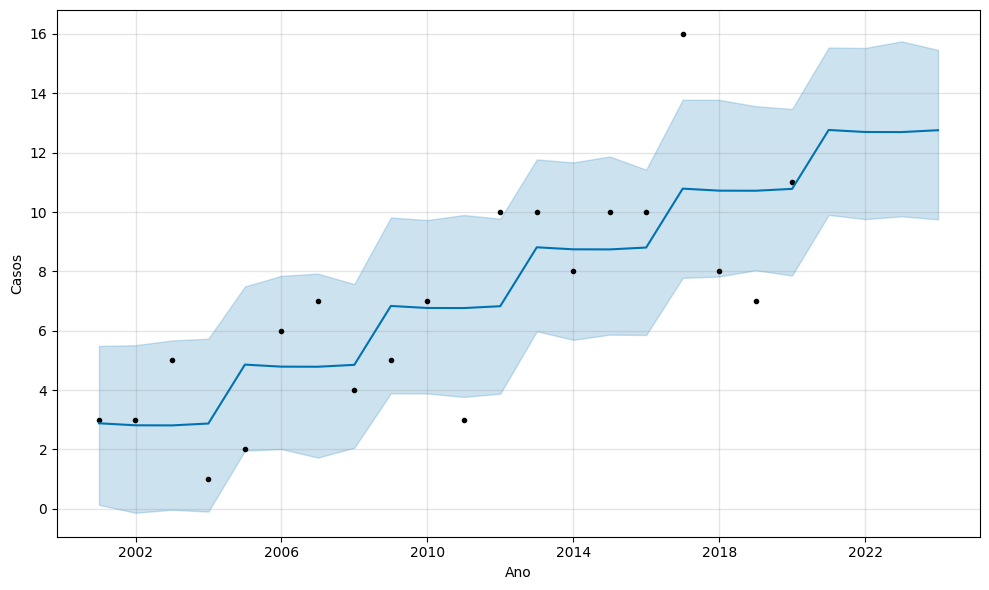

In [27]:
fig1 = m.plot(forecast, xlabel='Ano', ylabel='Casos')


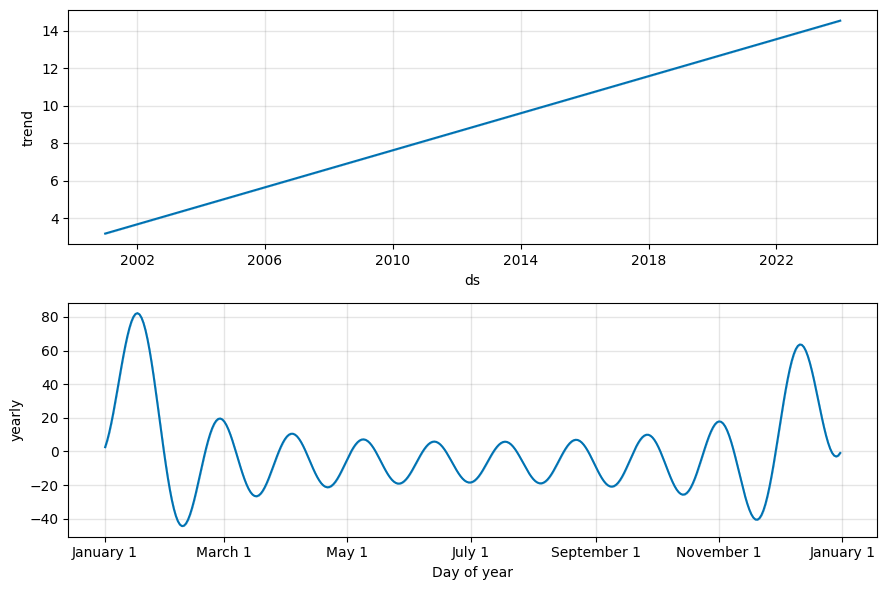

In [28]:
fig2 = m.plot_components(forecast)





#DIAGNOSTICO - Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

numero_dias_no_ano = 365
quantidade_de_anos_analisados= df.shape[0]

quantidade_para_treino = quantidade_de_anos_analisados *0.50
quantidade_para_horizonte = quantidade_de_anos_analisados * 0.25

# o tamanho do período de treinamento inicial (em dias)
periodo_de_treino = quantidade_para_treino * numero_dias_no_ano

# periodo de cada corte (em dias)
periodo_de_corte = numero_dias_no_ano

# horizonte de previsão (em dias)
horizonte = quantidade_para_horizonte * numero_dias_no_ano

# dataframe com os valores reais y e os valores de previsão fora da amostra yhat, em cada data de previsão simulada e para cada data de corte.
df_cv = cross_validation(m, initial=f'{periodo_de_treino} days', period=f'{periodo_de_corte} days', horizon=f'{horizonte} days')

# métricas de desempenho - MSE, RMSE, MAE, MAPE e MDAPE
metrics = performance_metrics(df_cv)
metrics

In [ ]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')


.

.

.

## Modelo para uso do pyMannKendall


# 👇

In [ ]:
!pip install pymannkendall

Análise de Tendência dos valores após análise de predição pelo profeta

👇

In [ ]:
import pymannkendall as mk

result = mk.original_test(forecast[['yhat']])
print(result)

## Útima etapa
Pegar os valores e salvar em uma página da planilha
#✋ ***Atenção! Só executar esta etapa, caso queira gravar na planilha.***



In [ ]:
import datetime
# gerando um novo nome baseado no tempo
x = datetime.datetime.now()
nome_nova_pagina = "analise "+ x.strftime("%d/%m/%Y-%X")

# criar uma página na planilha com x colunas e y linhas

pagina_com_estimativas = planilha.add_worksheet(nome_nova_pagina, rows=forecast.shape[0], cols=forecast.shape[1])

In [ ]:
forecast['ds'] = forecast['ds'].astype(str)
# transferir os dados do dataframe para a planilha
pagina_com_estimativas.update([forecast.columns.values.tolist()] + forecast.values.tolist())